# Assignment 7 

# Topic Modelling

Topic modeling is a technique to uncover hidden topics in large text collections. Key methods include LDA, NMF, and LSA. It helps in organizing, summarizing, and analyzing text data, with applications in document clustering, search engines, recommendations, and trend analysis. Challenges involve choosing the right number of topics, ensuring interpretability, managing large datasets, and evaluating topic quality. Despite these challenges, it provides valuable insights from textual data.

In [3]:
import pandas as pd
file = r"C:/Users/T Bala Sleeva Reddy/Downloads/amazon_reviews.csv/amazon_reviews.csv"
df = pd.read_csv(file)
df.head(20)


reviewId                         userName  \
0   0899edc2-6dd0-4e40-8471-6836dfc52b00                Quintasha Jackson   
1   dc8496a1-bb8f-40cd-9ac7-5dc2ba1a6703                 Tiffany Boisvert   
2   3492103d-2761-4385-b764-d7d2351d6996                     Kim Hilliker   
3   b49415d0-0f8e-48c9-bf29-718be6cc8b67                 Joshua Dickenson   
4   bee4d6f7-dba0-4895-946e-80432f769eb5                 Mohammed Abdalla   
5   616e28bc-3359-4c6d-9008-bca2efb8603a                  Belinda Littles   
6   65128c64-86af-4c9b-891d-5b276175793a                     jerry merkle   
7   05d5b4fa-11b4-41ac-9978-47f80bd47c94                  diamant diamant   
8   46aa1c43-7ff5-4402-a01a-d7e664f5fbf5                     Tony Washere   
9   84ac698b-cb0e-4fbf-8418-e5089cf4eb32                 Jacqueline Ortiz   
10  240f3f16-d134-4a6b-8ff1-359e122af46a                  Ramon Siqueiros   
11  bb74bdbc-c363-4c0d-8739-47f5eb1d7508                    Lee Kupreance   
12  1dc125dc-441a-4541-8108-b992e07cc41b                    Brenda Rucker   
13  cf2c501a-3816-433b-946d-9958767760e4                      Yos Gautama   
14  376f89a2-b99b-4888-8870-d54ae6be3cca                  Linda Haslinger   
15  1f584bda-5778-417c-81df-fd36821919f0                   Jason Lindeman   
16  3ffee7d4-0213-4ffd-85f9-67ea4412981f                        Rob Degen   
17  f1266d40-2e59-460b-a811-379dcac2d77c  Muhammad Shahid Muhammad Shahid   
18  2fc54d79-b6ed-4e45-bb6e-2a8695334107                          Bearcub   
19  452bb81a-f5d1-4286-a329-bf980fb0e39f                      louis smith   

                                              content  score  thumbsUpCount  \
0                                    I love Amazon ❤️      5              0   
1                             difficult to figure out      1              0   
2   wonderful and fast, efficient a d great custom...      5              0   
3   "Your orders" screen keeps flashing, can't see...      1              0   
4                                                 💙💙💙      5              0   
5                                               great      5              0   
6   The app is fine, but Amazon customer service i...      1              0   
7   Need more improvements with : price ,more accu...      1              0   
8   I still can't get to load my orders in my phon...      1              0   
9   Update 5-13-24 so much fun you could buy anyth...      5              0   
10  I like Amazon it's good with something to buy ...      4              0   
11                            Amazon has EVERYTHING!.      4              0   
12                                       Very helpful      4              0   
13  Before my first order succeed, amazon put my a...      1              0   
14  I love shopping on Amazon. I can find anything...      5              0   
15                                              Great      5              0   
16  easy to order and amazing return process if ne...      5              0   
17                                               Nice      5              0   
18                      easy to use and great pricing      5              0   
19                                           Poor 4.4      2              0   

   reviewCreatedVersion                   at   appVersion  
0            28.9.2.100  2024-05-14 23:17:13   28.9.2.100  
1            28.7.0.100  2024-05-14 23:16:52   28.7.0.100  
2            28.9.2.100  2024-05-14 22:41:20   28.9.2.100  
3            28.9.2.100  2024-05-14 22:39:32   28.9.2.100  
4            28.7.0.100  2024-05-14 22:34:00   28.7.0.100  
5            28.7.0.100  2024-05-14 22:31:51   28.7.0.100  
6            28.5.2.100  2024-05-14 22:27:31   28.5.2.100  
7            28.9.2.100  2024-05-14 22:22:48   28.9.2.100  
8            28.9.2.100  2024-05-14 22:08:44   28.9.2.100  
9            28.9.2.100  2024-05-14 22:07:05   28.9.2.100  
10           28.9.2.100  2024-05-14 21:54:15   28.9.2.100  
11                  NaN  2024-05-1

In [4]:
print(df.index)


RangeIndex(start=0, stop=50650, step=1)


In [6]:
for index in df.index:
    print(repr(df.loc[index, "content"][:400]))


'I love Amazon ❤️'
'difficult to figure out'
'wonderful and fast, efficient a d great customer service. love it!'
'"Your orders" screen keeps flashing, can\'t see well enough to check the status of things I\'ve ordered. Very annoying!'
'💙💙💙'
'great'
'The app is fine, but Amazon customer service is getting worse....... it takes more than 30 minutes to actually talk to someone.'
'Need more improvements with : price ,more accurate details about product and with selers to can cheat directly and ask ... Its 2024 but when yo scrollin appl to see a product its repeated hundreds of times neeed more options'
"I still can't get to load my orders in my phone app. S22+"
'Update 5-13-24 so much fun you could buy anything you want so easy to use and so helpful I recommend this app too every one'
"I like Amazon it's good with something to buy and some shows they have"
'Amazon has EVERYTHING!.'
'Very helpful'
'Before my first order succeed, amazon put my account on hold and will review it in the next 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
import re
df["paragraphs"] = df["content"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["content"].map(len)


In [8]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


The code uses TfidfVectorizer from scikit-learn to convert text documents into TF-IDF vectors. It imports stop words from SpaCy, initializes the vectorizer to exclude these stop words and to filter out terms appearing in fewer than 5 documents or more than 70% of documents. It then fits and transforms the 'artist_verses' column of a DataFrame df, producing a sparse matrix of TF-IDF features.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize the TfidfVectorizer with stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['content'])
tfidf_text_vectors.shape


C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(50650, 6933)

In [14]:

paragraph_df = pd.DataFrame([{ "content": paragraph, "score": score } 
                               for paragraphs, score in zip(df["paragraphs"], df["score"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


content  score
0                                   I love Amazon ❤️      5
1                            difficult to figure out      1
2  wonderful and fast, efficient a d great custom...      5
3  "Your orders" screen keeps flashing, can't see...      1
4                                                💙💙💙      5
5                                              great      5
6  The app is fine, but Amazon customer service i...      1
7  Need more improvements with : price ,more accu...      1
8  I still can't get to load my orders in my phon...      1
9  Update 5-13-24 so much fun you could buy anyth...      5

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize the TfidfVectorizer with stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["content"])
tfidf_para_vectors.shape


C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(50650, 6933)

The code uses Non-negative Matrix Factorization (NMF) from scikit-learn to extract 10 latent topics from TF-IDF vectors of text data. It generates W_text_matrix for document-topic distribution and H_text_matrix for topic-term distribution.
from sklearn.decomposition import NMF

In [17]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [18]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Call display_topics with corrected argument
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  amazon (10.79)
  shopping (8.36)
  best (2.94)
  online (2.11)
  shop (1.55)

Topic 01
  app (5.70)
  update (2.11)
  keeps (1.36)
  open (1.36)
  fix (1.20)

Topic 02
  service (10.95)
  customer (9.10)
  help (1.24)
  delivery (1.11)
  excellent (1.09)

Topic 03
  easy (24.05)
  use (8.95)
  fast (3.73)
  convenient (3.57)
  quick (3.15)

Topic 04
  great (28.77)
  prices (4.87)
  products (2.61)
  fast (2.33)
  deals (2.03)

Topic 05
  prime (7.06)
  shipping (4.37)
  delivery (4.15)
  day (3.88)
  free (2.41)

Topic 06
  search (3.51)
  items (2.26)
  find (1.45)
  bar (1.17)
  results (1.05)

Topic 07
  good (23.87)
  prices (2.45)
  products (2.18)
  quality (1.90)
  pretty (1.45)

Topic 08
  love (35.07)
  need (2.26)
  absolutely (2.22)
  fast (1.90)
  amazon (1.83)

Topic 09
  order (2.68)
  account (1.79)
  time (1.48)
  money (1.32)
  card (1.07)


# Now selecting different 10 topics

In [19]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Extract feature names from the vocabulary of TfidfVectorizer
feature_names = tfidf_para_vectorizer.get_feature_names_out()

# Display topics
display_topics(nmf_para_model, feature_names)

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic 00
  amazon (10.79)
  shopping (8.36)
  best (2.94)
  online (2.11)
  shop (1.55)

Topic 01
  app (5.70)
  update (2.11)
  keeps (1.36)
  open (1.36)
  fix (1.20)

Topic 02
  service (10.95)
  customer (9.10)
  help (1.24)
  delivery (1.11)
  excellent (1.09)

Topic 03
  easy (24.05)
  use (8.95)
  fast (3.73)
  convenient (3.57)
  quick (3.15)

Topic 04
  great (28.77)
  prices (4.87)
  products (2.61)
  fast (2.33)
  deals (2.03)

Topic 05
  prime (7.06)
  shipping (4.37)
  delivery (4.15)
  day (3.88)
  free (2.41)

Topic 06
  search (3.51)
  items (2.26)
  find (1.45)
  bar (1.17)
  results (1.05)

Topic 07
  good (23.87)
  prices (2.45)
  products (2.18)
  quality (1.90)
  pretty (1.45)

Topic 08
  love (35.07)
  need (2.26)
  absolutely (2.22)
  fast (1.90)
  amazon (1.83)

Topic 09
  order (2.68)
  account (1.79)
  time (1.48)
  money (1.32)
  card (1.07)


# Determining the topic sizes

In [20]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.78107029, 19.36642884,  8.59103058,  6.74191604,  6.89388827,
        9.84297   , 13.75965344,  6.24066505,  5.62555076, 14.15682671])

In [21]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([ 8.78107029, 19.36642884,  8.59103058,  6.74191604,  6.89388827,
        9.84297   , 13.75965344,  6.24066505,  5.62555076, 14.15682671])

In [22]:
print(paragraph_df.columns)


Index(['content', 'score'], dtype='object')


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize CountVectorizer with stop words
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["content"])
count_para_vectors.shape

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(50650, 6933)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stop words to a list
stop_words_list = list(stopwords)

# Initialize CountVectorizer with stop words
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Fit and transform the data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["content"])
count_para_vectors.shape


(50650, 6933)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


In [30]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())



Topic 00
  amazon (7.03)
  love (6.10)
  great (4.60)
  easy (4.27)
  shopping (3.83)

Topic 01
  app (10.46)
  update (2.83)
  amazon (1.76)
  open (1.41)
  fix (1.37)

Topic 02
  amazon (4.01)
  order (3.00)
  service (2.91)
  customer (2.76)
  refund (1.54)

Topic 03
  card (3.21)
  app (2.54)
  account (2.34)
  new (2.27)
  search (1.75)

Topic 04
  prime (6.90)
  amazon (4.48)
  money (2.27)
  shipping (2.22)
  pay (1.87)

Topic 05
  app (7.15)
  phone (3.00)
  amazon (2.99)
  account (1.89)
  use (1.38)

Topic 06
  amazon (6.13)
  shopping (2.15)
  find (1.91)
  buy (1.87)
  app (1.59)

Topic 07
  customer (2.73)
  service (2.42)
  reviews (2.30)
  amazon (1.87)
  review (1.44)

Topic 08
  delivery (3.87)
  day (2.72)
  amazon (1.77)
  delivered (1.67)
  order (1.66)

Topic 09
  app (3.96)
  search (2.29)
  page (1.82)
  items (1.79)
  list (1.53)


In [32]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([12.67669866, 15.10113123, 10.12959751,  6.68412731,  8.35897563,
        9.17887575, 10.64517081,  6.13167968,  8.44879949, 12.64494393])

In [33]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pyLDAvis

# Assuming you have already trained your LDA model
# lda_para_model = LatentDirichletAllocation(...)
# count_para_vectors = ...  # Document-term matrix from CountVectorizer
# count_para_vectorizer = ...  # CountVectorizer object

# Transform the data using the LDA model
lda_topics = lda_para_model.transform(count_para_vectors)

# Assuming you have the vocabulary and term frequency from your CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).tolist()[0]

# Convert lda_topics to the format expected by pyLDAvis
topic_term_dists = lda_para_model.components_
doc_topic_dists = lda_topics
doc_lengths = (count_para_vectors != 0).sum(axis=1).A1
term_frequency = count_para_vectors.sum(axis=0).tolist()[0]

# Prepare the data for visualization
lda_display_data = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display_data)


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

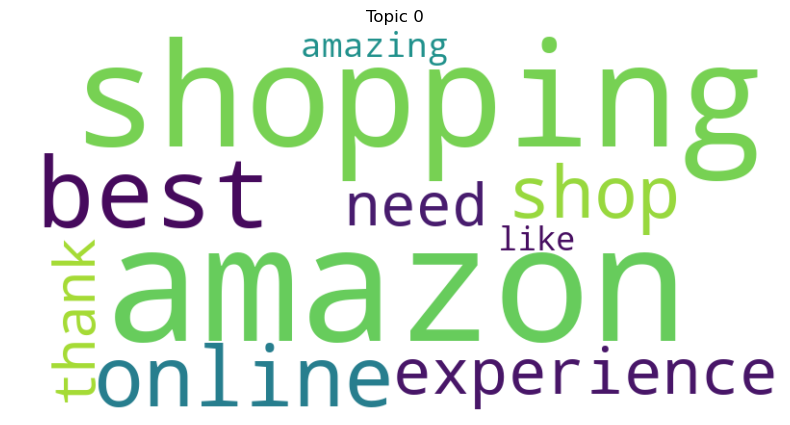

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90


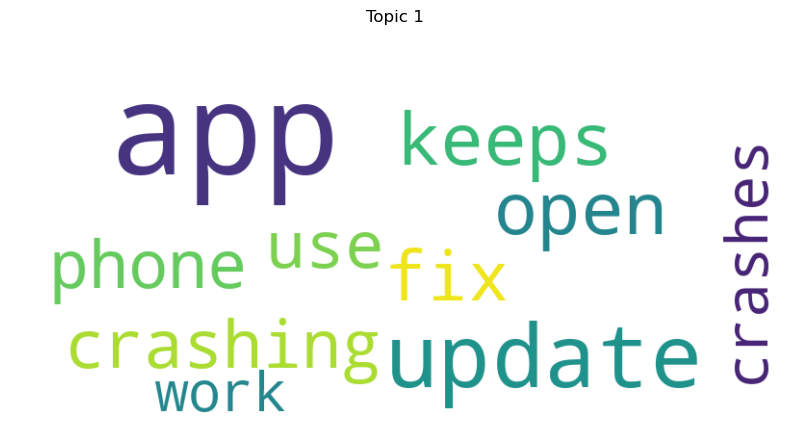

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

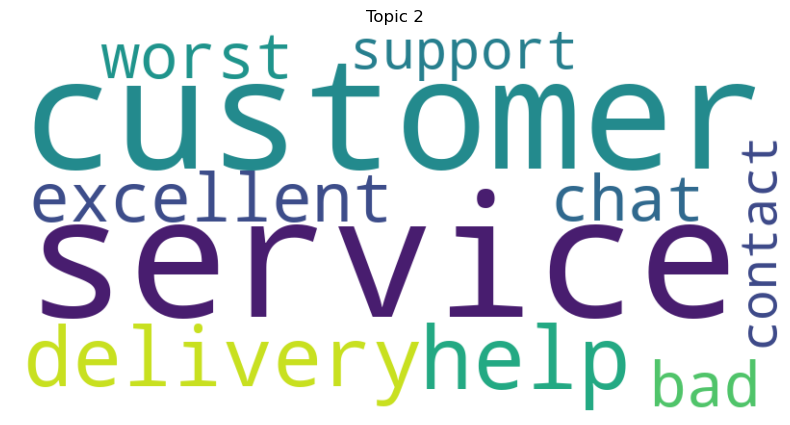

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

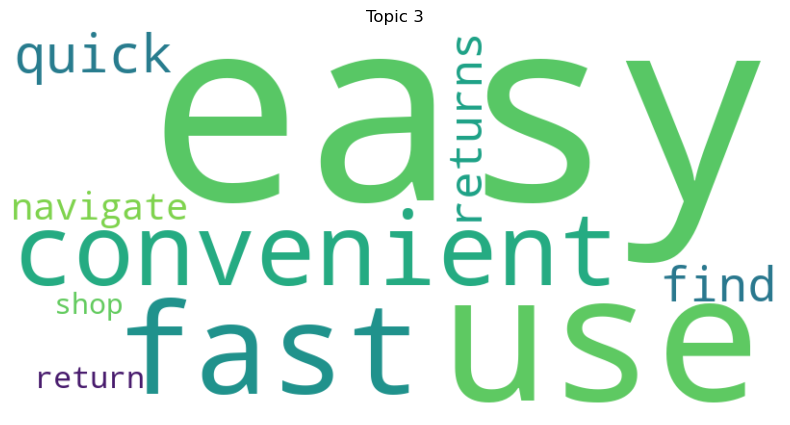

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N

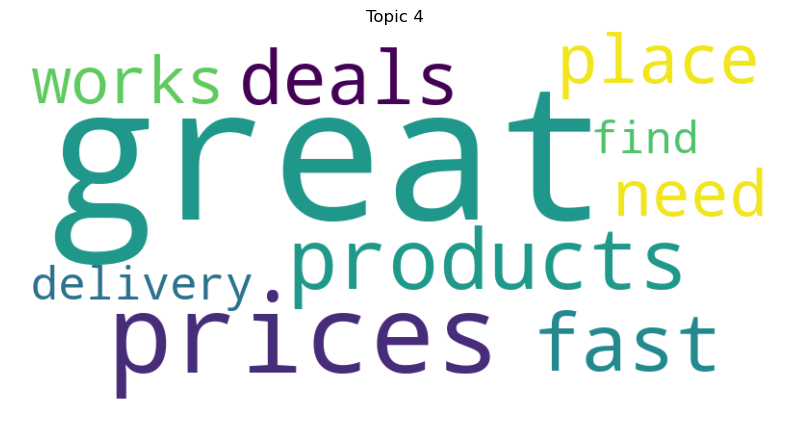

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

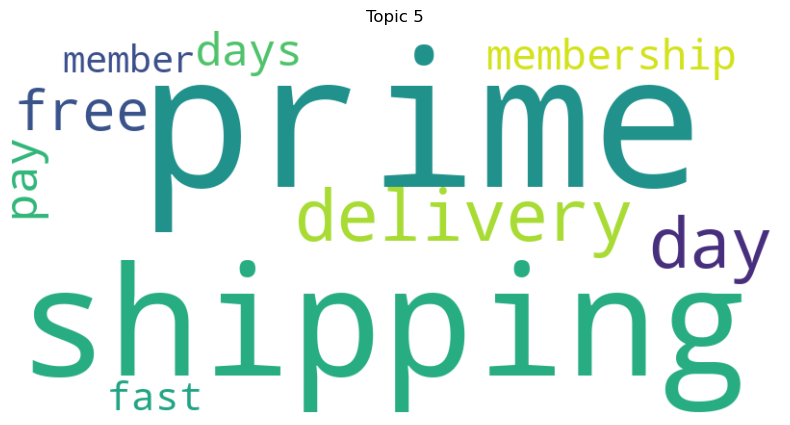

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Slee

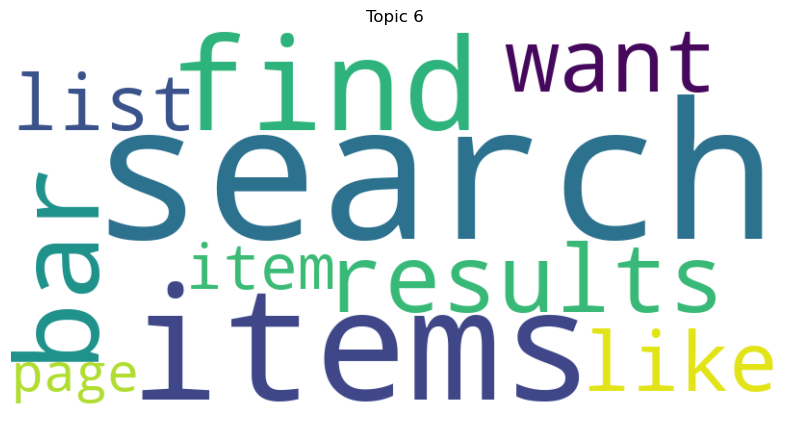

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

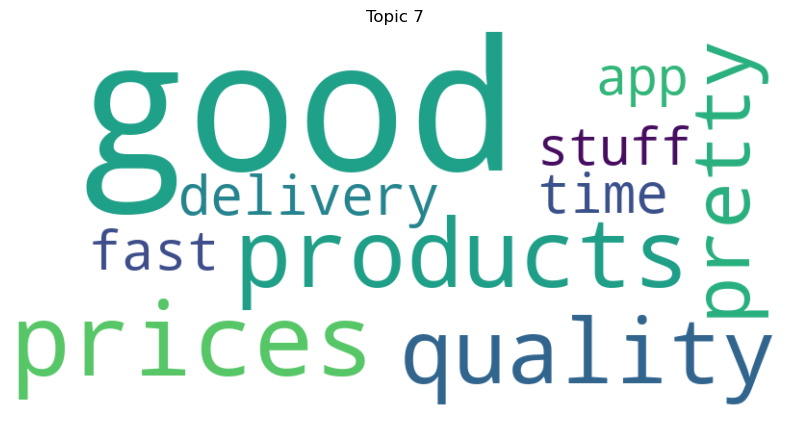

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N

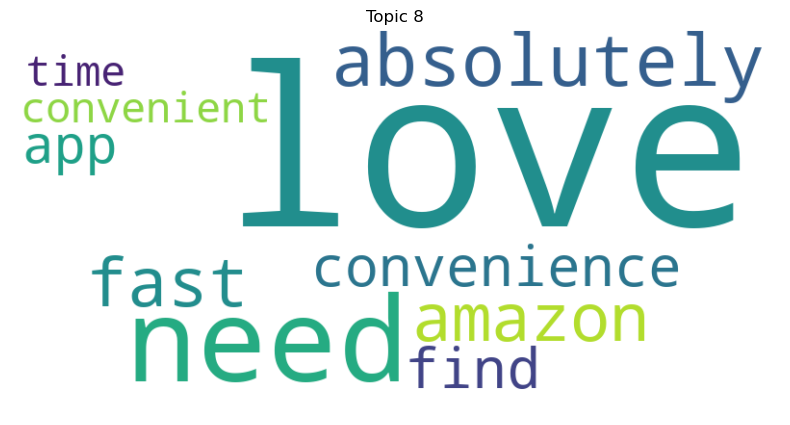

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.RO

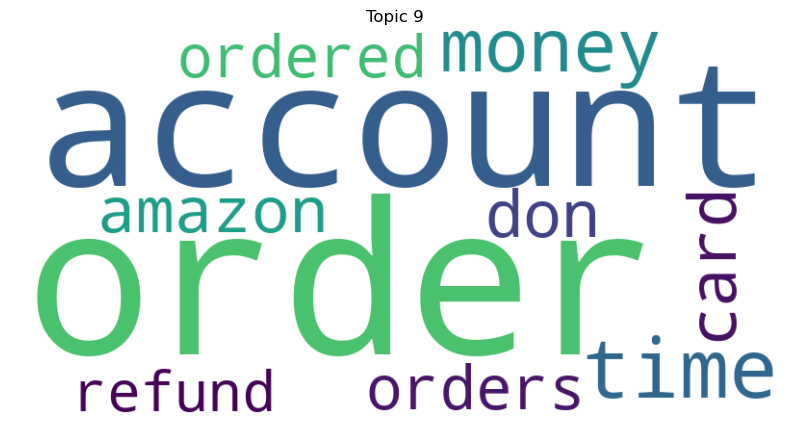

In [38]:
def wordcloud_topics(model, feature_names, num_words=10):
    # Initialize an empty dictionary to store topic words and their weights
    topic_words = {}

    # Iterate over each topic in the model
    for topic_idx, topic in enumerate(model.components_):
        # Get the top words for the current topic
        top_features_ind = topic.argsort()[:-num_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        # Store the topic words and their weights in the dictionary
        topic_words[topic_idx] = dict(zip(top_features, topic[top_features_ind]))

        # Create and display the word cloud for the current topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words[topic_idx])
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx}')
        plt.axis('off')
        plt.show()

# Assuming you have already trained your NMF model and TF-IDF vectorizer
# nmf_para_model = NMF(...)
# tfidf_para_vectorizer = TfidfVectorizer(...)

# Generate word clouds for topics
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N

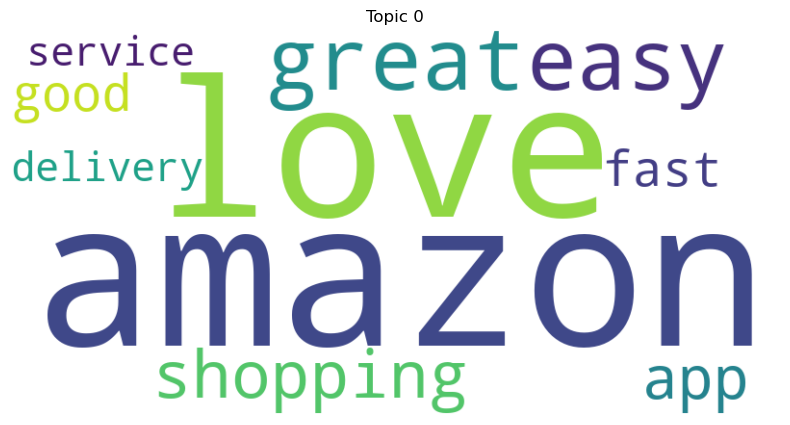

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


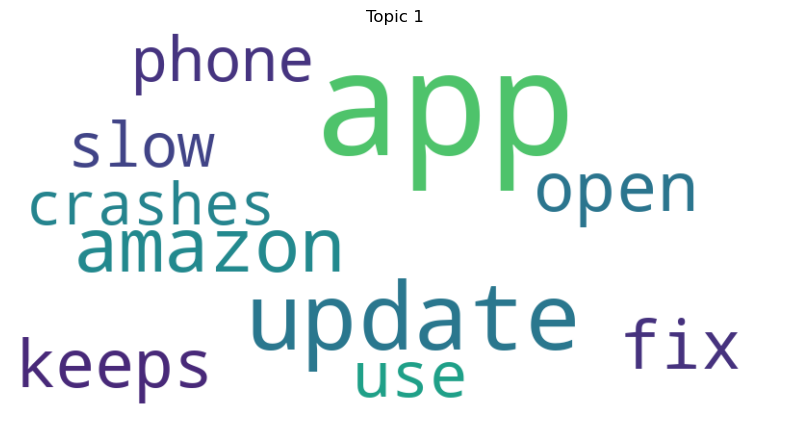

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N

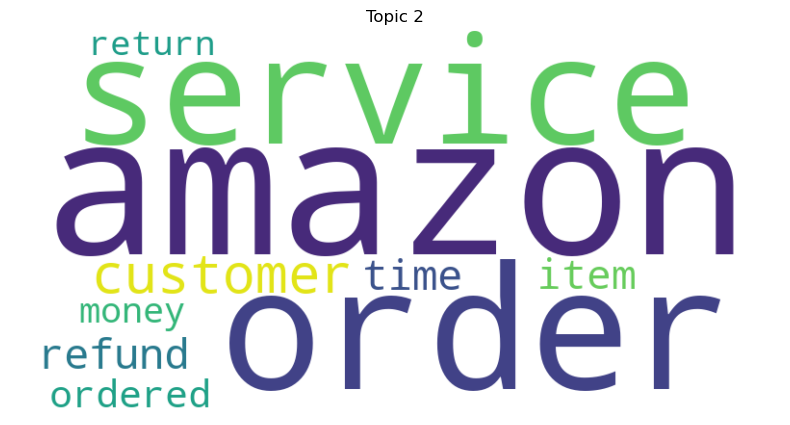

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Slee

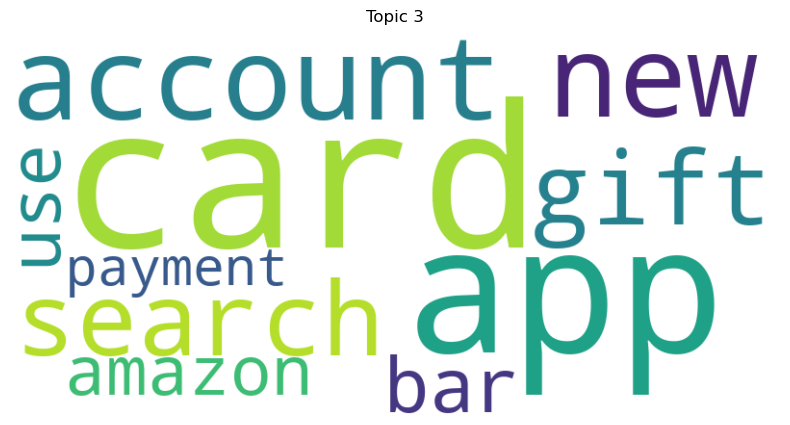

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

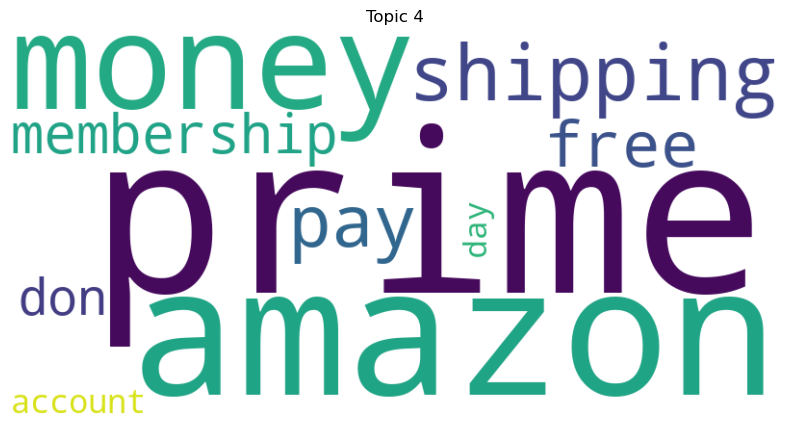

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


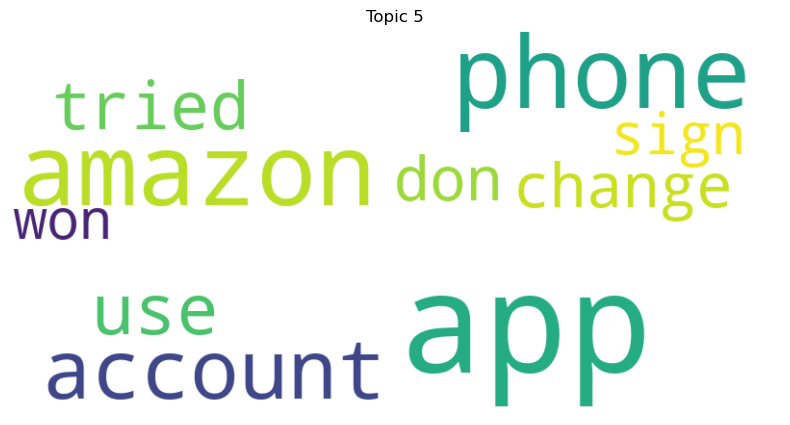

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is N

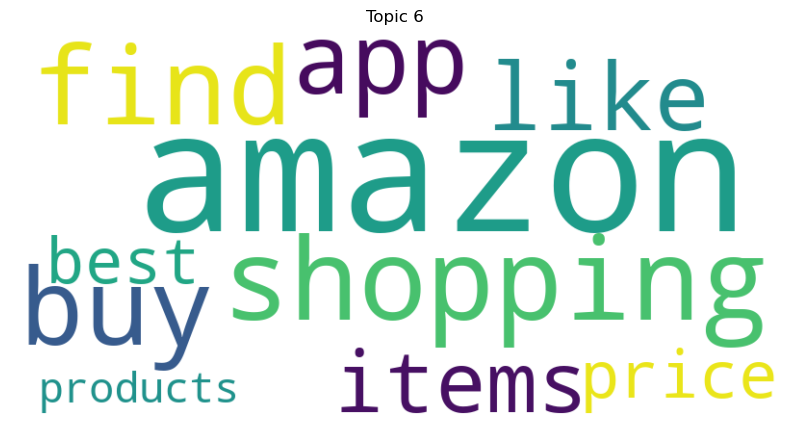

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.

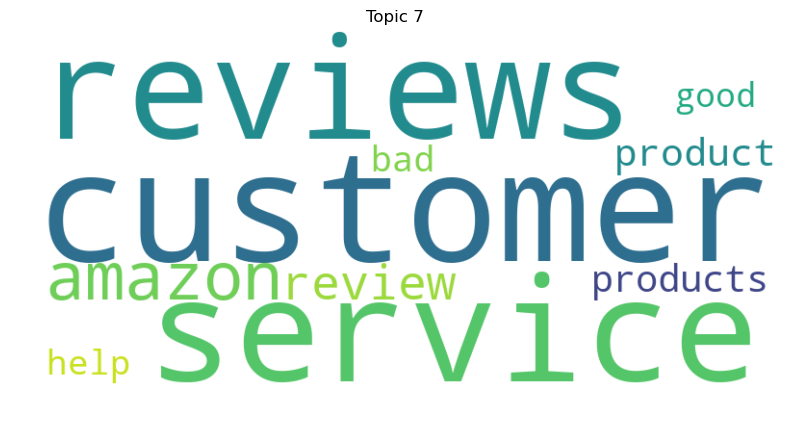

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.RO

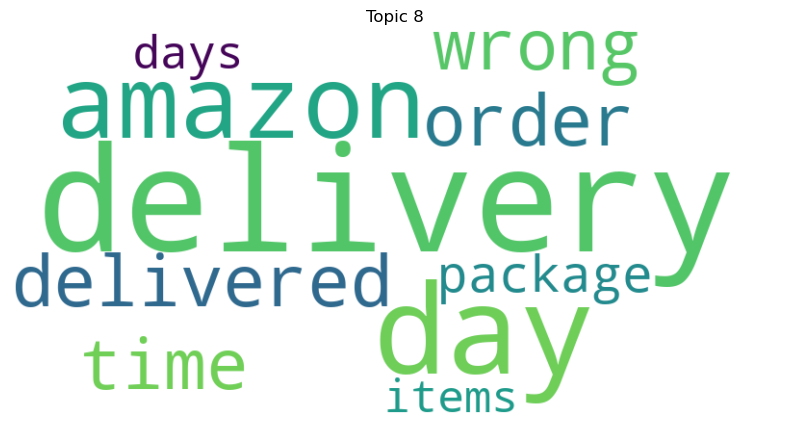

C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\T Bala Sleeva Reddy\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


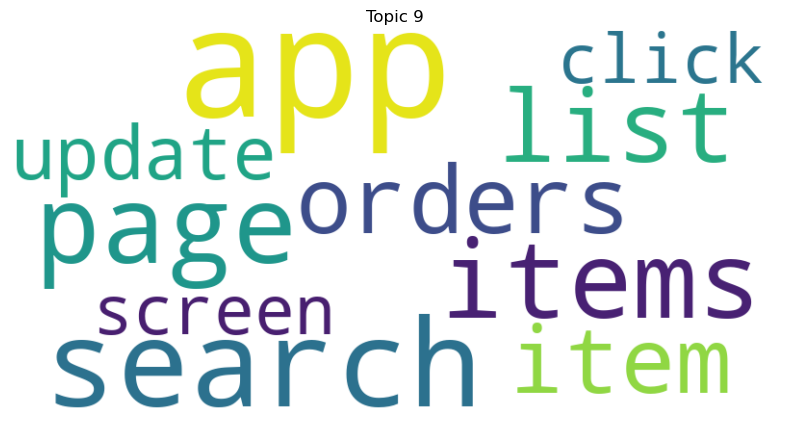

In [39]:
# Assuming you have already trained your LDA model and CountVectorizer
# lda_para_model = LatentDirichletAllocation(...)
# count_para_vectorizer = CountVectorizer(...)

# Generate word clouds for topics
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [40]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_words = [voc[i] for i in important[-2:]]
    topic_name = " ".join(top_words)
    topic_names.append("Topic " + topic_name)

# Seperating data by year

In [41]:
from tqdm.auto import tqdm
import numpy as np
score_data = []
for score in tqdm(np.unique(np.unique(paragraph_df["score"]))):
    W_score = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["score"] == score)])
    score_data.append([score] + list(W_score.sum(axis=0)/W_score.sum()*100.0))


  0%|          | 0/5 [00:00<?, ?it/s]

# Depicting the score chart

<AxesSubplot:xlabel='score'>

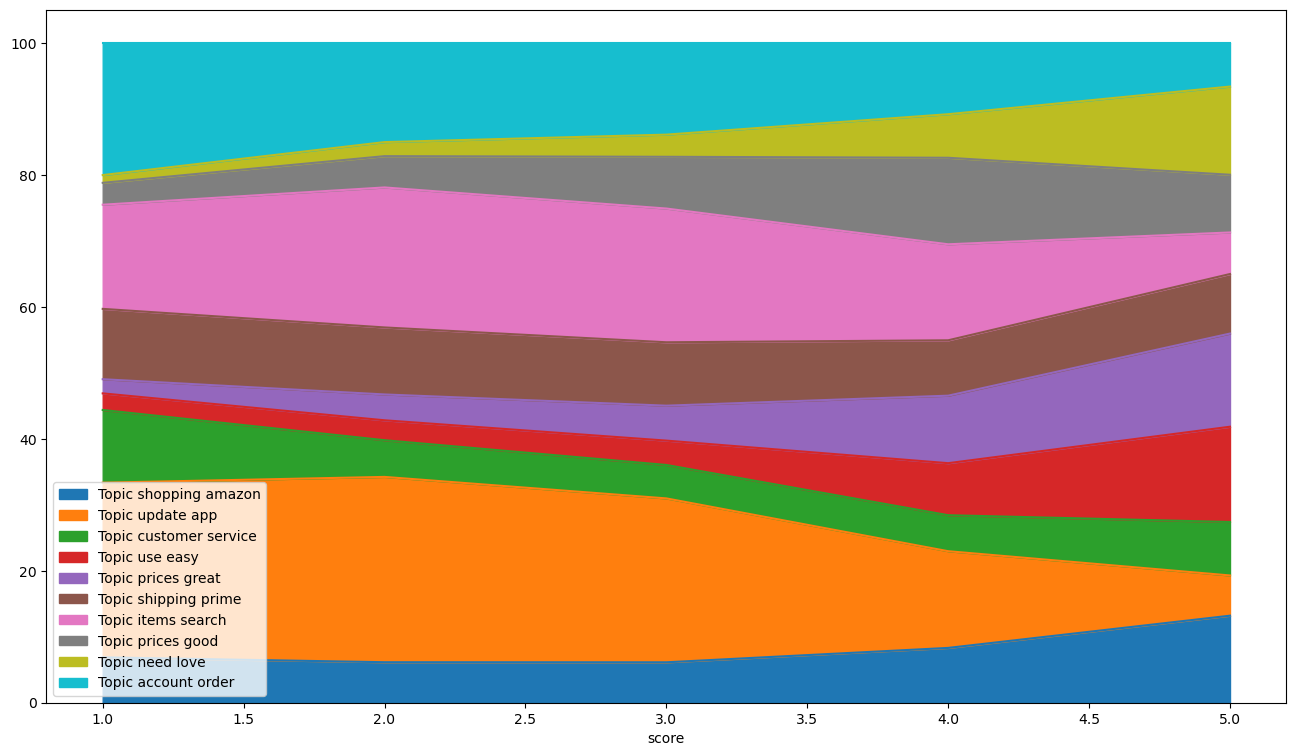

In [42]:
import matplotlib.pyplot as plt
df_score = pd.DataFrame(score_data, columns=["score"] + topic_names).set_index("score")
df_score.plot.area(figsize=(16,9))
